In [65]:
#Importing Libraries

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.holtwinters import SimpleExpSmoothing 
from statsmodels.tsa.holtwinters import Holt 
from statsmodels.tsa.holtwinters import ExponentialSmoothing 
import statsmodels.graphics.tsaplots as tsa_plots
import statsmodels.formula.api as smf 

In [67]:
import datetime as dt
import calendar

In [68]:
#Reading the dataset

In [69]:
df = pd.read_csv(r"D:\excelr assignments\project\Dataset\Gold_data.csv")

In [70]:
df.head()

,date,price
0,2016-01-01,2252.60
1,2016-01-02,2454.50
2,2016-01-03,2708.10
3,2016-01-04,2577.80
4,2016-01-05,2597.75


In [71]:
#EDA

In [72]:
df['price'].skew()

0.6373117447689824

In [73]:
df['price'].kurt()

-1.2431585470188062

In [74]:
df.describe()

,price
count,2182.000000
mean,3284.450046
std,719.564434
min,2252.600000
25%,2697.020000
50%,2879.800000
75%,4147.325000
max,4966.300000


In [75]:
len(df)

2182

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2182 entries, 0 to 2181
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    2182 non-null   object 
 1   price   2182 non-null   float64
dtypes: float64(1), object(1)
memory usage: 34.2+ KB


In [77]:
df.shape

(2182, 2)

In [78]:
df['date'] = pd.to_datetime(df['date'])

In [79]:
df.dtypes

date     datetime64[ns]
price           float64
dtype: object

In [80]:
df.isnull().sum()

date     0
price    0
dtype: int64

In [81]:
df.duplicated().sum()

0

In [82]:
df['price'].max()

4966.3

In [83]:
df['price'].min()

2252.6

In [84]:
df['price'].value_counts().head(15)

2598.7    4
2892.7    4
2731.8    3
2695.2    3
2768.7    3
3372.2    3
2870.4    3
3596.1    3
2860.4    3
4579.2    3
2731.7    3
2869.0    3
2849.0    3
2859.5    3
2819.3    3
Name: price, dtype: int64

In [85]:
#Visualization

<AxesSubplot:xlabel='price'>

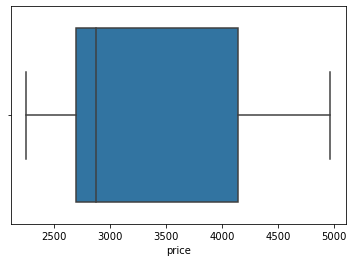

In [86]:
sns.boxplot(x =df['price'])

<AxesSubplot:xlabel='price', ylabel='Count'>

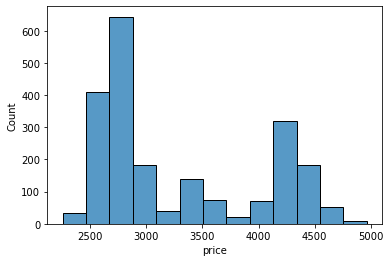

In [87]:
sns.histplot(df['price'])

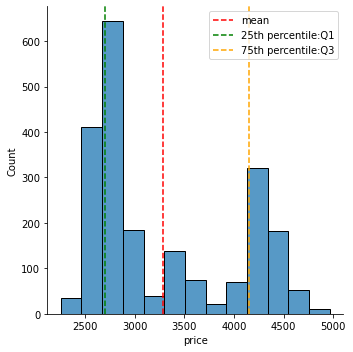

In [88]:
sns.displot(df['price'])
plt.axvline(x=np.mean(df['price']), c='red', ls='--', label='mean')
plt.axvline(x=np.percentile(df['price'],25),c='green', ls='--', label = '25th percentile:Q1')
plt.axvline(x=np.percentile(df['price'],75),c='orange', ls='--',label = '75th percentile:Q3' )
plt.legend()

In [89]:
df['year'] = df['date'].dt.year

In [90]:
df['month'] = df['date'].dt.month

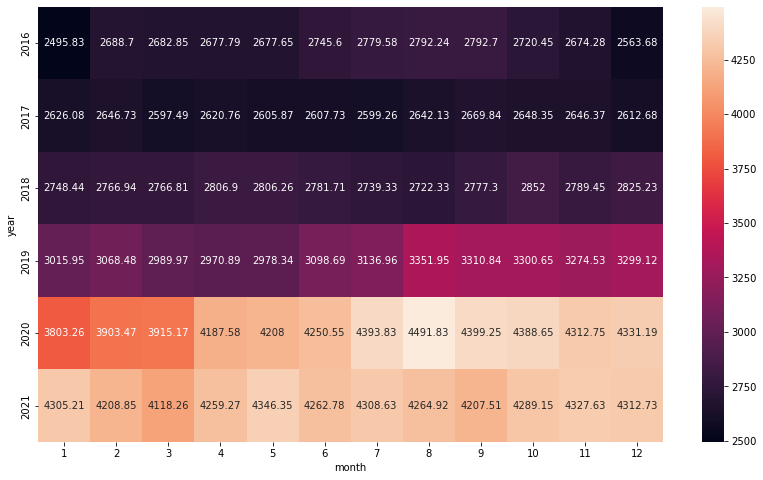

In [91]:
plt.figure(figsize=(14,8))
heatmap = pd.pivot_table(data=df,values="price",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap,annot=True,fmt="g") #fmt is format of the grid values
plt.show()

In [92]:
df.set_index(['date'],inplace=True)

In [93]:
df

,price,year,month
date,,,
2016-01-01,2252.60,2016,1
2016-01-02,2454.50,2016,1
2016-01-03,2708.10,2016,1
2016-01-04,2577.80,2016,1
2016-01-05,2597.75,2016,1
...,...,...,...
2021-12-17,4394.40,2021,12
2021-12-18,4389.50,2021,12
2021-12-19,4389.50,2021,12


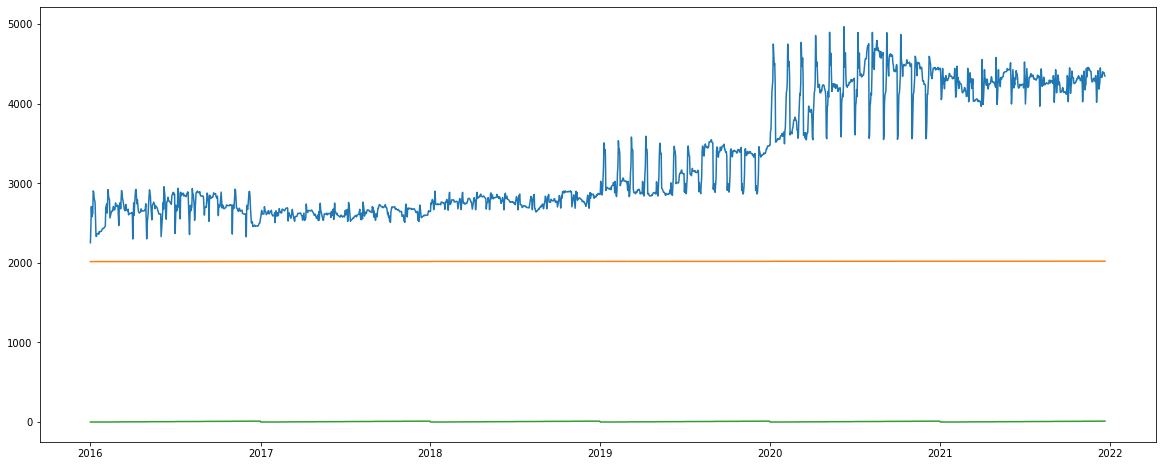

In [94]:
plt.figure(figsize=(20,8))
plt.plot(df)

In [95]:
df['month'] = df['month'].apply(lambda x: calendar.month_name[x])

In [96]:
df.groupby(['year'])['price'].sum()/365

year
2016    2697.985708
2017    2626.676484
2018    2781.938082
2019    3150.210685
2020    4227.930411
2021    4149.970959
Name: price, dtype: float64

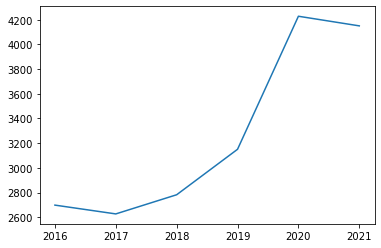

In [97]:
plt.plot(df.groupby(['year'])['price'].sum()/365)

Text(0.5, 1.0, 'Rolling Mean')

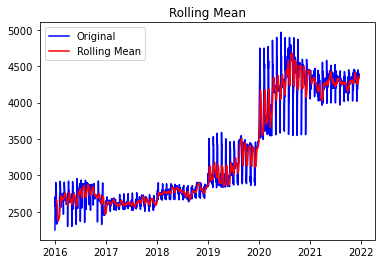

In [98]:
rolmean = df.price.rolling(12).mean()
orig = plt.plot(df.price, color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
plt.legend(loc='best')
plt.title('Rolling Mean')

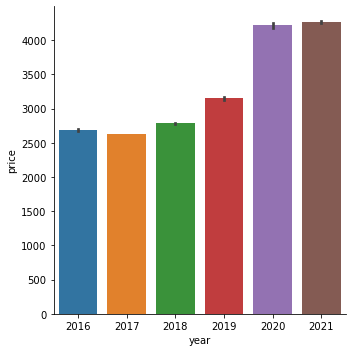

In [99]:
sns.catplot(x='year',y='price',data=df,kind='bar')

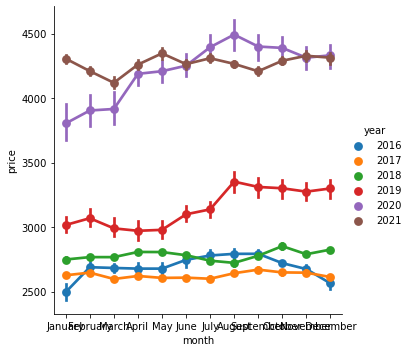

In [100]:
sns.catplot(data = df, x ="month", y = "price", hue = "year",kind='point')

<AxesSubplot:xlabel='year', ylabel='price'>

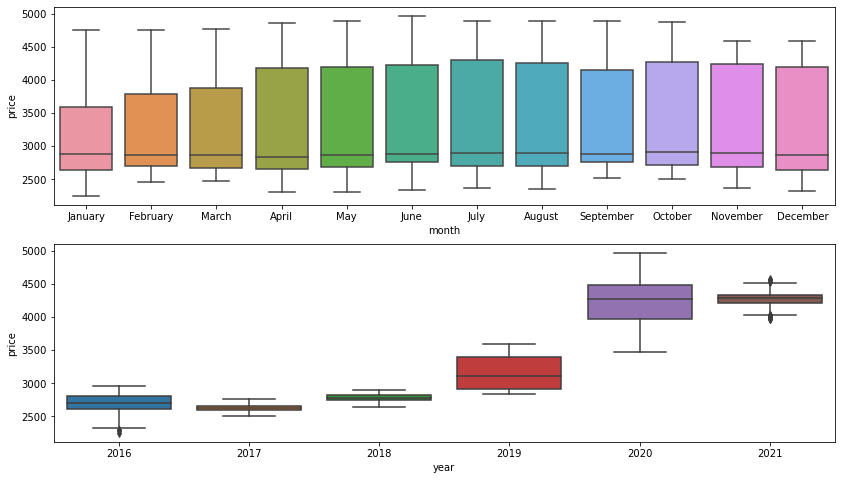

In [101]:
#Box Plot of Each Year by Monthly Intervals
plt.figure(figsize=(14,8))
plt.subplot(211)
sns.boxplot(x="month", y="price", data=df)
plt.subplot(212)
sns.boxplot(x="year", y="price", data=df)


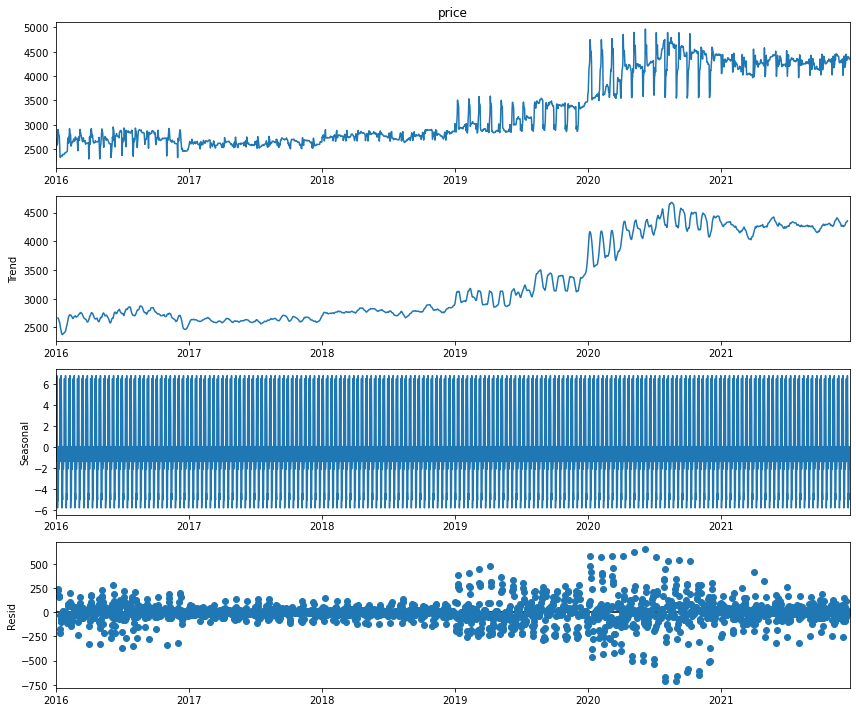

In [102]:
decompose_ts_add = seasonal_decompose(df.price, period=12, model='additive')
with plt.rc_context():
    plt.rc("figure", figsize=(12,10))
    decompose_ts_add.plot()
    

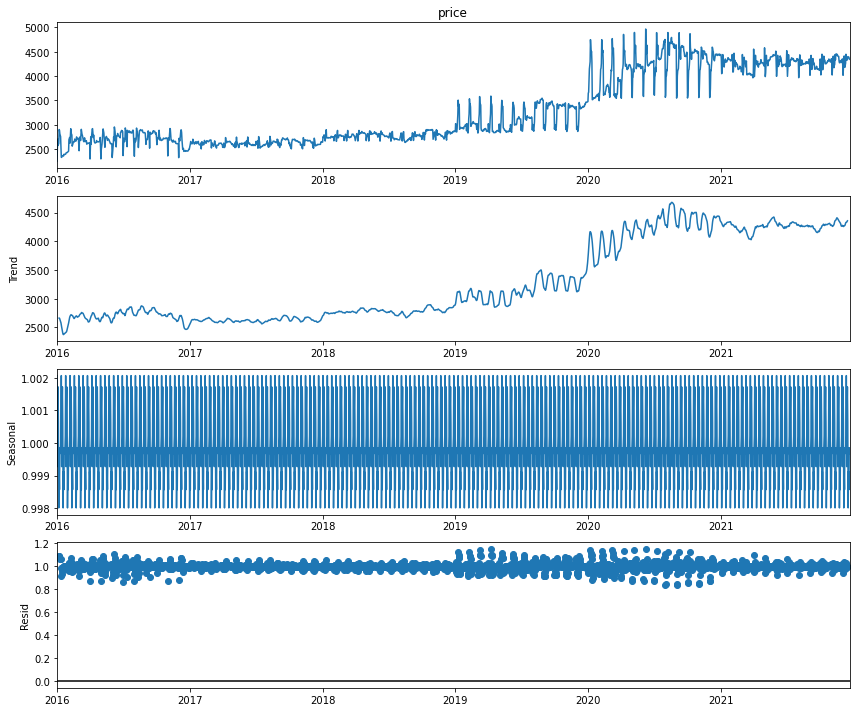

In [103]:
decompose_ts_add = seasonal_decompose(df.price, period=12, model='multiplicative')
with plt.rc_context():
    plt.rc("figure", figsize=(12,10))
    decompose_ts_add.plot()
    

In [104]:
#Check for stationarity of data

In [105]:
def adf_test(series):
    result=adfuller(series,autolag='AIC')
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [106]:
adf_test(df['price'])

ADF Statistics: -0.30990365705047707
p- value: 0.9240899189079188
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [107]:
## Use Techniques Differencing
df['price First Difference']=df['price']-df['price'].shift(1)

In [108]:
adf_test(df['price First Difference'].dropna())

ADF Statistics: -21.66454212724635
p- value: 0.0
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [109]:
#ACF and PACF

C:\Users\lokit\anaconda3\anaconda\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


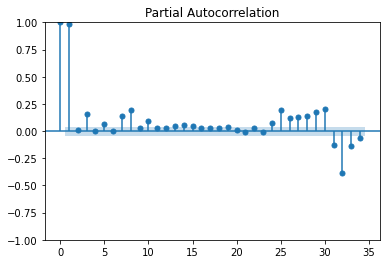

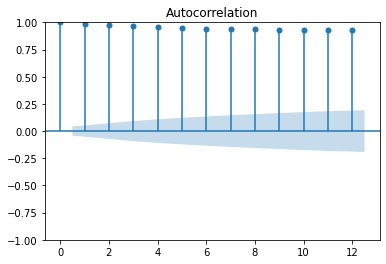

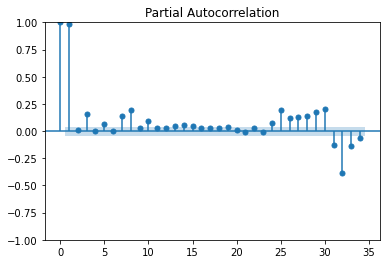

In [110]:
tsa_plots.plot_acf(df['price'],lags=12)
tsa_plots.plot_pacf(df.price)

C:\Users\lokit\anaconda3\anaconda\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


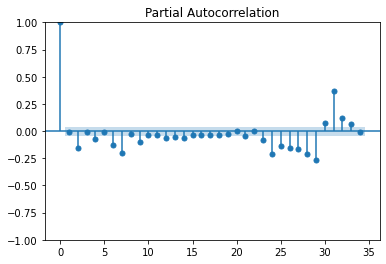

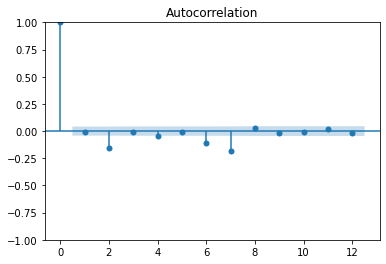

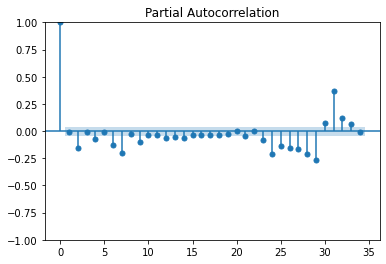

In [111]:
tsa_plots.plot_acf(df['price First Difference'].dropna(),lags=12)
tsa_plots.plot_pacf(df['price First Difference'].dropna())

In [112]:
df["t"] = np.arange(1,2183)

df["t_squared"] = df["t"]*df["t"]

df["log_price"] = np.log(df["price"])

In [113]:
month_dummies = pd.get_dummies(df['month'])
df = pd.concat([df,month_dummies],axis=1)

In [114]:
Train = df.head(2152)
Test = df.tail(30)

In [115]:
def MAPE(pred,org):
    temp = np.abs((pred-org))*100/org
    return np.mean(temp)

In [116]:
#data driven

In [117]:
# Simple Exponential Method

In [118]:

ses_model = SimpleExpSmoothing(Train.price).fit()
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.price)

C:\Users\lokit\anaconda3\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


2.353934131154247

In [119]:
# Holt method 

In [120]:

hw_model = Holt(Train.price).fit()
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.price)

C:\Users\lokit\anaconda3\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


3.1592148521546806

In [121]:
# Holts winter exponential smoothing with additive seasonality and additive trend

In [122]:

hwe_model_add_add = ExponentialSmoothing(Train.price,seasonal="add",trend="add",seasonal_periods=12,damped=True).fit()
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.price)

C:\Users\lokit\AppData\Local\Temp\ipykernel_17720\1252931681.py:1: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  hwe_model_add_add = ExponentialSmoothing(Train.price,seasonal="add",trend="add",seasonal_periods=12,damped=True).fit()
C:\Users\lokit\anaconda3\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


2.2285601080875135

In [123]:
# Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [124]:

hwe_model_mul_add = ExponentialSmoothing(Train.price,seasonal="mul",trend="add",seasonal_periods=12).fit()
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.price)

C:\Users\lokit\anaconda3\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


2.846087022662996

In [125]:
hwe_model_add_add.forecast(30)

2021-11-22    4388.636402
2021-11-23    4374.366615
2021-11-24    4374.483585
2021-11-25    4394.175286
2021-11-26    4404.070551
2021-11-27    4398.857859
2021-11-28    4397.775440
2021-11-29    4390.260118
2021-11-30    4405.210616
2021-12-01    4398.095922
2021-12-02    4394.952616
2021-12-03    4404.715135
2021-12-04    4388.757070
2021-12-05    4374.485847
2021-12-06    4374.601398
2021-12-07    4394.291697
2021-12-08    4404.185577
2021-12-09    4398.971516
2021-12-10    4397.887744
2021-12-11    4390.371086
2021-12-12    4405.320263
2021-12-13    4398.204265
2021-12-14    4395.059669
2021-12-15    4404.820915
2021-12-16    4388.861591
2021-12-17    4374.589124
2021-12-18    4374.703447
2021-12-19    4394.392531
2021-12-20    4404.285211
2021-12-21    4399.069965
Freq: D, dtype: float64

In [172]:
model_dict = {'Model':pd.Series(['ses_model','hw_model','hwe_model_add_add','hwe_model_mul_add']),'MAPE':pd.Series(['2.353934131154247','3.1592148521546806','2.2285601080875135','2.846087022662996'])}

In [173]:
dict_model = pd.DataFrame.from_dict(model_dict)

In [174]:
dict_model

,Model,MAPE
0,ses_model,2.353934131154247
1,hw_model,3.1592148521546806
2,hwe_model_add_add,2.2285601080875135
3,hwe_model_mul_add,2.846087022662996


In [126]:
hwe_model_add_add_model =pd.DataFrame(hwe_model_add_add.forecast(30),columns=['price'])

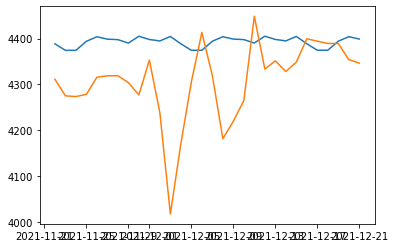

In [128]:
plt.plot(hwe_model_add_add_model)
plt.plot(Test.price)

In [129]:
#model based

In [130]:
#Linear mode;

In [131]:
linear_model = smf.ols('price~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['price'])-np.array(pred_linear))**2))
rmse_linear


103.15443682194355

In [132]:
#Exponential model

In [133]:
Exp = smf.ols('log_price~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['price'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

144.41640747448696

In [134]:
#Quadraric

In [135]:
Quad = smf.ols('price~t+t_squared',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_squared"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['price'])-np.array(pred_Quad))**2))
rmse_Quad

533.9441755137714

In [136]:
# Additive seasonality 

In [137]:
add_sea = smf.ols('price~January+February+March+April+May+June+July+August+September+October+November+December',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['January','February','March','April','May','June','July','August','September','October','November','December']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['price'])-np.array(pred_add_sea))**2))
rmse_add_sea

1139.3462879731935

In [138]:
# Additive Seasonality Quadratic #

In [139]:
add_sea_Quad = smf.ols('price~t+t_squared+January+February+March+April+May+June+July+August+September+October+November+December',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['January','February','March','April','May','June','July','August','September','October','November','December','t','t_squared']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['price'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

452.65306754700117

In [140]:
# Multiplicative Seasonality #

In [141]:
Mul_sea = smf.ols('log_price~January+February+March+April+May+June+July+August+September+October+November+December',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['price'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

1206.4516308510697

In [142]:
#Multiplicative Additive Seasonality #

In [143]:
Mul_Add_sea = smf.ols('log_price~t+January+February+March+April+May+June+July+August+September+October+November+December',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['price'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea

96.56019231165332

In [144]:
data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse

,MODEL,RMSE_Values
0,rmse_linear,103.154437
1,rmse_Exp,144.416407
2,rmse_Quad,533.944176
3,rmse_add_sea,1139.346288
4,rmse_add_sea_quad,452.653068
5,rmse_Mult_sea,1206.451631
6,rmse_Mult_add_sea,96.560192


In [145]:
#from pmdarima import auto_arima

In [146]:
#train_1=df.head(2152)
#test_1=df.tail(30)

In [147]:
#import warnings
#warnings.filterwarnings("ignore")
  
# Fit auto_arima function to Gold Price dataset
#stepwise_fit = auto_arima(train_1['price'],start_p = 1, start_q = 1,
#                          max_p = 3, max_q = 3, m = 12,
#                          start_P = 0, seasonal = True,
#                          d = None, D = 1, trace = True,
#                          error_action ='ignore',   # we don't want to know if an order does not work
#                          suppress_warnings = True,  # we don't want convergence warnings
#                          stepwise = True) # set to stepwise

In [148]:
#stepwise_fit.summary()

In [149]:
#prediction = pd.DataFrame(stepwise_fit.predict(n_periods = 30),index=test_1.index,columns=['price'])
#prediction.index = test_1.date

NameError: name 'stepwise_fit' is not defined

In [ ]:
#prediction

In [ ]:
#prediction.index = test_1.date

In [ ]:
#MAPE(prediction.price,test_1.price)

In [ ]:
#df.set_index('date',inplace=True)

In [ ]:
#stepwise_fit_1 = auto_arima(df['price'],start_p = 1, start_q = 1,
#                          max_p = 3, max_q = 3, m = 12,
#                          start_P = 0, seasonal = True,
#                          d = None, D = 1, trace = True,
#                          error_action ='ignore',   # we don't want to know if an order does not work
#                          suppress_warnings = True,  # we don't want convergence warnings
#                          stepwise = True) # set to stepwise

In [ ]:
#prediction_2 = pd.Series(stepwise_fit_1.predict(n_periods = 30))
#prediction_2

In [ ]:
#plt.figure(figsize=(15,5))
#plt.plot(prediction,label='test prediction')
#plt.plot(prediction_2)
#plt.legend()

In [ ]:
#plt.figure(figsize=(15,5))
#plt.plot(test_1.price,label='test prediction')
#plt.plot(prediction_2)
#plt.legend()

In [151]:
hwe_model_add_add = ExponentialSmoothing(df.price,seasonal="add",trend="add",seasonal_periods=12,damped=True).fit()

C:\Users\lokit\AppData\Local\Temp\ipykernel_17720\3838122736.py:1: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  hwe_model_add_add = ExponentialSmoothing(df.price,seasonal="add",trend="add",seasonal_periods=12,damped=True).fit()
C:\Users\lokit\anaconda3\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [152]:
import pickle
pickle.dump(hwe_model_add_add, open('D:/excelr assignments/project/Dataset/hwe_model_add_add.pkl', 'wb'))